In [4]:
import nltk
nltk.download('punkt') #recognizes punctuation.
nltk.download('averaged_perceptron_tagger') #default part of speech tagger for NLTK.
nltk.download('maxent_ne_chunker') #Named Entity Chunker for NLTK. 
nltk.download('words') #NLTK corpus of words.
##!pip install spacy
#!python -m spacy download en_core_web_sm
import nltk
nltk.download('omw-1.4')
#!pip3 install textblob
#pip install -U pip pattern
#-m pip install textblob
from textblob import TextBlob
from pattern.en import sentiment
from wordcloud import WordCloud

import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import asyncio
import aiohttp
import json
#pip install pattern
#pip install -U textblob
#!pip3 install pattern
#!pip3 install wordcloud
#!pip install -U pip wordcloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
pip install pattern

In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [6]:
 
text ="Mining and resources companies were given an extraordinary level of access to the highest rungs of the New South Wales government in the past four years, securing roughly 188 meetings with ministers in 235 weeks. An analysis of four and a half years of the state’s ministerial diaries shows the NSW Minerals Council has obtained regular access to resources, planning and finance ministers, and the offices of premiers and deputy premiers. The council was given 61 meetings with NSW ministers, more than anyone except the NSW Farmers Association, the City of Sydney council and Penrith city council. Further meetings were granted to multinational resource and energy companies such as Shenhua, Whitehaven, Glencore, AGL, Rio Tinto, BHP, Origin Energy, Santos, Anglo American and Centennial Coal."
 
tokenized = nltk.word_tokenize(text)
pos_tagged = nltk.pos_tag(tokenized)
chunks = nltk.ne_chunk(pos_tagged)
for chunk in chunks:
    if hasattr(chunk, 'label'):
        print(chunk)

(GPE Mining/NN)
(ORGANIZATION New/NNP South/NNP Wales/NNP)
(ORGANIZATION NSW/NNP Minerals/NNP Council/NNP)
(ORGANIZATION NSW/NNP)
(ORGANIZATION NSW/NNP Farmers/NNP Association/NNP)
(ORGANIZATION City/NNP)
(GPE Sydney/NNP)
(GPE Penrith/NNP)
(ORGANIZATION Shenhua/NNP)
(GPE Whitehaven/NNP)
(PERSON Glencore/NNP)
(ORGANIZATION AGL/NNP)
(PERSON Rio/NNP Tinto/NNP)
(ORGANIZATION BHP/NNP)
(PERSON Origin/NNP Energy/NNP)
(GPE Santos/NNP)
(PERSON Anglo/NNP American/NNP)
(ORGANIZATION Centennial/NNP Coal/NNP)


# Using guardian API

#### For Rio Tinto

In [7]:
guardian_api_key = "231ce917-65b5-4019-b365-c79f213379d1&q=Rio%20Tinto"
import requests as r

response = r.get(f'https://content.guardianapis.com/search?section=australia-news&q=xstrata&api-key={guardian_api_key}')
data = response.json()
data

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 353,
  'startIndex': 1,
  'pageSize': 10,
  'currentPage': 1,
  'pages': 36,
  'orderBy': 'relevance',
  'results': [{'id': 'australia-news/2022/jul/20/rio-tinto-agrees-to-pay-additional-613m-to-settle-dispute-with-australian-tax-office',
    'type': 'article',
    'sectionId': 'australia-news',
    'sectionName': 'Australia news',
    'webPublicationDate': '2022-07-20T08:38:49Z',
    'webTitle': 'Rio Tinto agrees to pay additional $613m to settle dispute with Australian tax office',
    'webUrl': 'https://www.theguardian.com/australia-news/2022/jul/20/rio-tinto-agrees-to-pay-additional-613m-to-settle-dispute-with-australian-tax-office',
    'apiUrl': 'https://content.guardianapis.com/australia-news/2022/jul/20/rio-tinto-agrees-to-pay-additional-613m-to-settle-dispute-with-australian-tax-office',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName': 'News'},
   {'id': 'australia-news/2022/apr/08/rio-t

In [8]:
article_content = r.get(f'{data["response"]["results"][0]["apiUrl"]}?api-key={guardian_api_key}&show-fields=bodyText')
article_content.json()

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'content': {'id': 'australia-news/2022/jul/20/rio-tinto-agrees-to-pay-additional-613m-to-settle-dispute-with-australian-tax-office',
   'type': 'article',
   'sectionId': 'australia-news',
   'sectionName': 'Australia news',
   'webPublicationDate': '2022-07-20T08:38:49Z',
   'webTitle': 'Rio Tinto agrees to pay additional $613m to settle dispute with Australian tax office',
   'webUrl': 'https://www.theguardian.com/australia-news/2022/jul/20/rio-tinto-agrees-to-pay-additional-613m-to-settle-dispute-with-australian-tax-office',
   'apiUrl': 'https://content.guardianapis.com/australia-news/2022/jul/20/rio-tinto-agrees-to-pay-additional-613m-to-settle-dispute-with-australian-tax-office',
   'fields': {'bodyText': 'Rio Tinto has agreed to pay the Australian taxation office an additional $613m to settle disputes over its financing arrangements and marketing hubs in Singapore, as part of what the ATO claims is one of t

In [9]:
text_rio= "'Rio Tinto has agreed to pay the Australian taxation office an additional $613m to settle disputes over its financing arrangements and marketing hubs in Singapore, as part of what the ATO claims is one of the biggest tax settlements in Australian history. The payment is on top of $378m the global mining giant had previously paid over the same dispute,bringing the total to almost $1bn in extra tax revenue. The ATO had been seeking about $1.2bn in tax and penalties. Tax arrangements for the next five years were also locked in as part of the deal. Rebecca Saint, an ATO deputy commissioner, said the settlement was “a very good outcome for the Australian tax system”. “This means that additional profits from the sale of Rio’s Australian-owned commodities will be taxed in Australia in the years to come,” she said. “The resolution of these matters means that ordinary Australians can have confidence that even the biggest companies are held to account to pay their tax due.” Starting in 2017, the ATO hit Rio Tinto with a series of large tax bills over its marketing hub in Singapore, which sells iron ore and aluminium on behalf of the group. The bills date back to 2010. Similar hubs are used by BHP and other miners, but their use became controversial in Australia in the mid-2010s amid a general crackdown by the ATO on multinational corporations. The ATO also pursued Rio Tinto in 2021 over money it borrowed within the group to pay a dividend to shareholders in 2015. Sign up to receive an email with the top stories from Guardian Australia every morning At the same time as striking a deal with the ATO, Rio Tinto has also settled a dispute with the Inland Revenue Authority of Singapore (Iras) over the treatment of the hubs. It had been seeking resolution of the issue under a tax treaty between Australia and Singapore but withdrew the request as a result of the deals with the ATO and Iras. “We are glad to have resolved these longstanding disputes and to have gained certainty over future tax outcomes relating to our Singapore marketing arrangements,” Rio Tinto’s chief financial officer, Peter Cunningham, said. “Rio Tinto remains committed to our commercial activities in Singapore and the valuable role played by our centralised commercial team.” The Albanese government welcomed the settlement. “Expecting local firms to compete against tax-dodging multinationals is like asking them to fight with one hand tied behind their backs,” the assistant minister for competition, charities and treasury, Andrew Leigh, said. “It’s just not fair. Closing multinational tax loopholes will create a better environment for productive firms to flourish, and add to the public confidence in our tax system."
tokenized = nltk.word_tokenize(text_rio)
pos_tagged = nltk.pos_tag(tokenized)
chunks = nltk.ne_chunk(pos_tagged)
for chunk in chunks:
    if hasattr(chunk, 'label'):
        print(chunk)

(ORGANIZATION Tinto/NNP)
(GPE Australian/JJ)
(GPE Singapore/NNP)
(ORGANIZATION ATO/NNP)
(GPE Australian/JJ)
(ORGANIZATION ATO/NNP)
(PERSON Rebecca/NNP Saint/NNP)
(ORGANIZATION ATO/NNP)
(GPE Australian/JJ)
(ORGANIZATION Rio/NNP)
(GPE Australia/NNP)
(ORGANIZATION ATO/NNP)
(PERSON Rio/NNP Tinto/NNP)
(GPE Singapore/NNP)
(ORGANIZATION BHP/NNP)
(GPE Australia/NNP)
(ORGANIZATION ATO/NNP)
(ORGANIZATION ATO/NNP)
(PERSON Rio/NNP Tinto/NNP)
(GPE Guardian/JJ)
(GPE Australia/NNP)
(ORGANIZATION ATO/NNP)
(PERSON Rio/NNP Tinto/NNP)
(ORGANIZATION Inland/NNP Revenue/NNP)
(GPE Singapore/NNP)
(GPE Iras/NNP)
(GPE Australia/NNP)
(GPE Singapore/NNP)
(ORGANIZATION ATO/NNP)
(GPE Iras/NNP)
(GPE Singapore/NNP)
(PERSON Peter/NNP Cunningham/NNP)
(GPE Singapore/NNP)
(GPE Albanese/JJ)
(PERSON Andrew/NNP Leigh/NNP)


# Mining Companies

In [10]:
guardian_api_key = "231ce917-65b5-4019-b365-c79f213379d1&q=mining-companies-nsw"
import requests as r

response = r.get(f'https://content.guardianapis.com/search?section=australia-news&q=xstrata&api-key={guardian_api_key}')
data = response.json()
data

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 11203,
  'startIndex': 1,
  'pageSize': 10,
  'currentPage': 1,
  'pages': 1121,
  'orderBy': 'relevance',
  'results': [{'id': 'australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes',
    'type': 'article',
    'sectionId': 'australia-news',
    'sectionName': 'Australia news',
    'webPublicationDate': '2022-08-23T17:30:12Z',
    'webTitle': 'Pay up: mining and gambling companies told not to expect sympathy over Queensland tax hikes',
    'webUrl': 'https://www.theguardian.com/australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes',
    'apiUrl': 'https://content.guardianapis.com/australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName': 'News'},
   {'id': 'aust

In [11]:
article_content = r.get(f'{data["response"]["results"][0]["apiUrl"]}?api-key={guardian_api_key}&show-fields=bodyText')
article_content.json()

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'content': {'id': 'australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes',
   'type': 'article',
   'sectionId': 'australia-news',
   'sectionName': 'Australia news',
   'webPublicationDate': '2022-08-23T17:30:12Z',
   'webTitle': 'Pay up: mining and gambling companies told not to expect sympathy over Queensland tax hikes',
   'webUrl': 'https://www.theguardian.com/australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes',
   'apiUrl': 'https://content.guardianapis.com/australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes',
   'fields': {'bodyText': 'Resources and gambling companies have been told to “pull their head in” and not expect public sympathy after taking high-profile actions to resist recent tax increases by the Queens

In [12]:
text_mining="Resources and gambling companies have been told to “pull their head in” and not expect public sympathy after taking high-profile actions to resist recent tax increases by the Queensland government. BHP’s chief executive, Mike Henry, last week said the mining giant would pause plans for its Blackwater South coalmine because of the state’s new royalty regime, unveiled as part of the June budget. Henry said the royalty changes “didn’t involve any engagement with industry” and increased risk for the company in Queensland. The move came amid windfall profits for BHP and despite the fact the company sought environmental approval from the federal government for the mine on 8 June, after the Queensland government had already flagged it was on the verge of increasing royalties. The mine is not expected to open before 2029. Ian Macfarlane, the chief executive of the Queensland Resources Council, met with the state treasurer, Cameron Dick, on 26 May to discuss the likelihood of coal royalties being increased after the expiry of a 10-year freeze. Queensland Conservation Council’s director, Dave Copeman, said it was only fair mining companies paid a reasonable amount of taxes after a decade without rises to coal royalties. “I think the resources companies need to pull their head in,” he said. “They can’t be out in the community spruiking all of the benefits [of mining], and then when it comes to actually paying their fair share of tax, go to war. “That hypocrisy is the reason why I don’t see the Queensland government backing down on this.” The state has also faced intense pressure from online wagering companies in recent weeks over an increase in the betting tax. Ladbrokes deprioritised Queensland horse races from its mobile apps and axed a $7.5m Brisbane Broncos sponsorship in response to the government’s plan to raise an additional $80m for the state’s racing industry via increased betting taxes. Sportsbet also pushed down the state’s races on its app – a move it has since reversed after making a deal with Racing Queensland. John Quiggin, a laureate fellow in economics at the University of Queensland, said he did not expect the mining or gambling industries to receive a great deal of public sympathy over the taxes. “The answer really is someone has to pay,” Quiggin said. “What you have is, on the one hand the mining industry that’s doing spectacularly well … and on the other hand the gambling industry which largely relies on government toleration to get the money it does.” Tim Costello, an advocate from the Alliance for Gambling Reform, said it was not surprising to see bookmakers push back against the tax increases. “We’ve been very blind to the political muscle and state capture by gambling interests here in Australia,” Costello said. “They have transformed their wealth into political power.” A spokesperson for the treasurer said the state government would proceed with the revenue changes, which were “made in the interest of all Queenslanders”. The spokesperson noted changes to the royalties were passed in state parliament with no opposition. “They are designed to ensure companies operating in Queensland pay their fair share and that Queenslanders get their fair share,” the spokesperson said. Macfarlane said on Sunday the hike in coal royalties was an “astronomical increase” and that companies were only given a few weeks’ notice of the plan. Guardian Australia has contacted BHP, Sportsbet and Ladbrokes for comment. • In Australia, the crisis support service Lifeline is 13 11 14. Gambling Help Online is available on 1800 858 858 and the National Debt Helpline is at 1800 007 007"

tokenized = nltk.word_tokenize(text_rio)
pos_tagged = nltk.pos_tag(tokenized)
chunks = nltk.ne_chunk(pos_tagged)
for chunk in chunks:
    if hasattr(chunk, 'label'):
        print(chunk)

(ORGANIZATION Tinto/NNP)
(GPE Australian/JJ)
(GPE Singapore/NNP)
(ORGANIZATION ATO/NNP)
(GPE Australian/JJ)
(ORGANIZATION ATO/NNP)
(PERSON Rebecca/NNP Saint/NNP)
(ORGANIZATION ATO/NNP)
(GPE Australian/JJ)
(ORGANIZATION Rio/NNP)
(GPE Australia/NNP)
(ORGANIZATION ATO/NNP)
(PERSON Rio/NNP Tinto/NNP)
(GPE Singapore/NNP)
(ORGANIZATION BHP/NNP)
(GPE Australia/NNP)
(ORGANIZATION ATO/NNP)
(ORGANIZATION ATO/NNP)
(PERSON Rio/NNP Tinto/NNP)
(GPE Guardian/JJ)
(GPE Australia/NNP)
(ORGANIZATION ATO/NNP)
(PERSON Rio/NNP Tinto/NNP)
(ORGANIZATION Inland/NNP Revenue/NNP)
(GPE Singapore/NNP)
(GPE Iras/NNP)
(GPE Australia/NNP)
(GPE Singapore/NNP)
(ORGANIZATION ATO/NNP)
(GPE Iras/NNP)
(GPE Singapore/NNP)
(PERSON Peter/NNP Cunningham/NNP)
(GPE Singapore/NNP)
(GPE Albanese/JJ)
(PERSON Andrew/NNP Leigh/NNP)


# Sentiment analysis

In [12]:
#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

In [13]:
html = article_content.text

In [14]:
# Printing the first 500 characters in html
print(html[:500])

{"response":{"status":"ok","userTier":"developer","total":1,"content":{"id":"australia-news/2022/aug/24/pay-up-mining-and-gambling-companies-told-not-to-expect-sympathy-over-queensland-tax-hikes","type":"article","sectionId":"australia-news","sectionName":"Australia news","webPublicationDate":"2022-08-23T17:30:12Z","webTitle":"Pay up: mining and gambling companies told not to expect sympathy over Queensland tax hikes","webUrl":"https://www.theguardian.com/australia-news/2022/aug/24/pay-up-mining


In [15]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()


In [13]:
#total length
len(text)

794

In [14]:
#having a look at the text
print(text_mining[100:1100])

hy after taking high-profile actions to resist recent tax increases by the Queensland government. BHP’s chief executive, Mike Henry, last week said the mining giant would pause plans for its Blackwater South coalmine because of the state’s new royalty regime, unveiled as part of the June budget. Henry said the royalty changes “didn’t involve any engagement with industry” and increased risk for the company in Queensland. The move came amid windfall profits for BHP and despite the fact the company sought environmental approval from the federal government for the mine on 8 June, after the Queensland government had already flagged it was on the verge of increasing royalties. The mine is not expected to open before 2029. Ian Macfarlane, the chief executive of the Queensland Resources Council, met with the state treasurer, Cameron Dick, on 26 May to discuss the likelihood of coal royalties being increased after the expiry of a 10-year freeze. Queensland Conservation Council’s director, Dave 

In [16]:
#clean_text= text_mining.replace("n", " ")
clean_text= text_mining.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "'"])

In [20]:
clean_text

'Resources a d gambli g compa ies have bee  told to “pull their head i ” a d  ot expect public sympathy after taki g high-profile actio s to resist rece t tax i creases by the Quee sla d gover me t. BHP’s chief executive, Mike He ry, last week said the mi i g gia t would pause pla s for its Blackwater South coalmi e because of the state’s  ew royalty regime, u veiled as part of the Ju e budget. He ry said the royalty cha ges “did ’t i volve a y e gageme t with i dustry” a d i creased risk for the compa y i  Quee sla d. The move came amid wi dfall profits for BHP a d despite the fact the compa y sought e viro me tal approval from the federal gover me t for the mi e o  8 Ju e, after the Quee sla d gover me t had already flagged it was o  the verge of i creasi g royalties. The mi e is  ot expected to ope  before 2029. Ia  Macfarla e, the chief executive of the Quee sla d Resources Cou cil, met with the state treasurer, Camero  Dick, o  26 May to discuss the likelihood of coal royalties be

In [17]:
#Now, we split the text into individual sentences.
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [18]:
sentence

['Resources and gambling companies have been told to “pull their head in” and not expect public sympathy after taking high-profile actions to resist recent tax increases by the Queensland government.',
 'BHP’s chief executive, Mike Henry, last week said the mining giant would pause plans for its Blackwater South coalmine because of the state’s new royalty regime, unveiled as part of the June budget.',
 'Henry said the royalty changes “didn’t involve any engagement with industry” and increased risk for the company in Queensland.',
 'The move came amid windfall profits for BHP and despite the fact the company sought environmental approval from the federal government for the mine on 8 June, after the Queensland government had already flagged it was on the verge of increasing royalties.',
 'The mine is not expected to open before 2029.',
 'Ian Macfarlane, the chief executive of the Queensland Resources Council, met with the state treasurer, Cameron Dick, on 26 May to discuss the likelihood

In [19]:
#How many sentences are there in the data?
print(len(sentence))

26


In [20]:
print(sentence[2])

Henry said the royalty changes “didn’t involve any engagement with industry” and increased risk for the company in Queensland.


Sentiment Analysis with Textblob
Textblob is a Python library for text processing and NLP. Textblob has built-in functions for performing sentiment analysis. The function returns a score for polarity and subjectivity.

Polarity score can be positive or negative, and Subjectivity varies between 0 and 1.

In [21]:
#create an empty list and get all the data
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [22]:
#convert this list to a data frame
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [23]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,Resources and gambling companies have been tol...,0.000000,0.158333
1,"BHP’s chief executive, Mike Henry, last week s...",0.045455,0.507071
2,Henry said the royalty changes “didn’t involve...,0.000000,0.000000
3,The move came amid windfall profits for BHP an...,0.000000,0.000000
4,The mine is not expected to open before 2029.,0.025000,0.450000


In [24]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      26 non-null     object 
 1   Polarity      26 non-null     float64
 2   Subjectivity  26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 752.0+ bytes


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

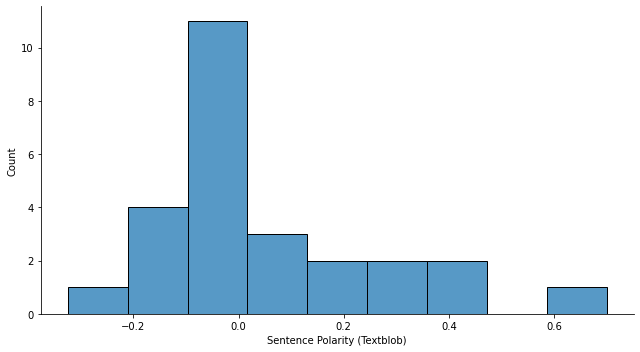

In [25]:
# analyse the sentence polarity
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")


Due to some reason around half the sentences have zero polarity. Maybe, it’s because of the fact that they are neutral. A few sentences are highly positive and a few are negative.

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

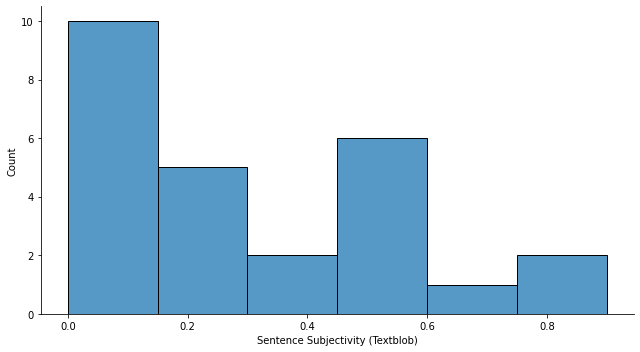

In [26]:
#Examining subjectivity
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

The values of subjectivity also vary, with few sentences being highly subjective and a majority of sentences being less subjective.

 # Sentiment Analysis with Pattern

In [27]:
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])

In [28]:
pattern_sentiment[1]

['BHP’s chief executive, Mike Henry, last week said the mining giant would pause plans for its Blackwater South coalmine because of the state’s new royalty regime, unveiled as part of the June budget.',
 0.04545454545454545,
 0.5070707070707071]

In [29]:
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [30]:
df_pattern.head()



,Sentence,Polarity,Subjectivity
0,Resources and gambling companies have been tol...,0.000000,0.158333
1,"BHP’s chief executive, Mike Henry, last week s...",0.045455,0.507071
2,Henry said the royalty changes “didn’t involve...,0.000000,0.000000
3,The move came amid windfall profits for BHP an...,0.000000,0.000000
4,The mine is not expected to open before 2029.,0.025000,0.450000


In [31]:
df_pattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      26 non-null     object 
 1   Polarity      26 non-null     float64
 2   Subjectivity  26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 752.0+ bytes


Text(0.5, 6.79999999999999, 'Sentence Polarity (Pattern)')

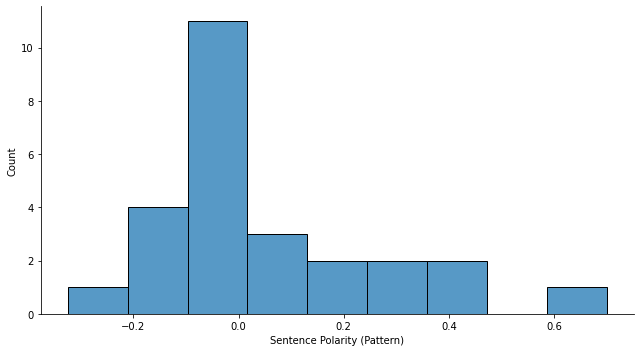

In [32]:
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Pattern)')

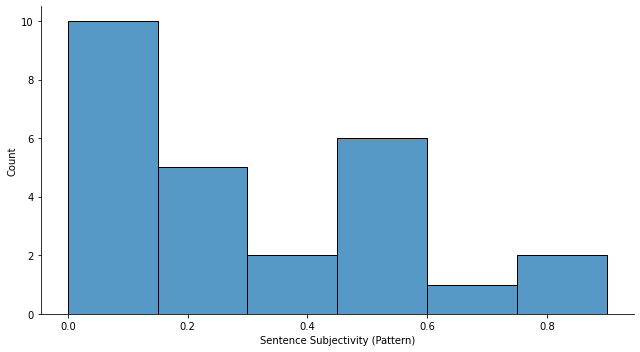

In [33]:
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")

# Word Frequency and Word Cloud

In [58]:
#Tokenizing the text
tokens=clean_text.split()
tokens

['Resources',
 'and',
 'gambling',
 'companies',
 'have',
 'been',
 'told',
 'to',
 '“pull',
 'their',
 'head',
 'in”',
 'and',
 'not',
 'expect',
 'public',
 'sympathy',
 'after',
 'taking',
 'high-profile',
 'actions',
 'to',
 'resist',
 'recent',
 'tax',
 'increases',
 'by',
 'the',
 'Queensland',
 'government.',
 'BHP’s',
 'chief',
 'executive,',
 'Mike',
 'Henry,',
 'last',
 'week',
 'said',
 'the',
 'mining',
 'giant',
 'would',
 'pause',
 'plans',
 'for',
 'its',
 'Blackwater',
 'South',
 'coalmine',
 'because',
 'of',
 'the',
 'state’s',
 'new',
 'royalty',
 'regime,',
 'unveiled',
 'as',
 'part',
 'of',
 'the',
 'June',
 'budget.',
 'Henry',
 'said',
 'the',
 'royalty',
 'changes',
 '“didn’t',
 'involve',
 'any',
 'engagement',
 'with',
 'industry”',
 'and',
 'increased',
 'risk',
 'for',
 'the',
 'company',
 'in',
 'Queensland.',
 'The',
 'move',
 'came',
 'amid',
 'windfall',
 'profits',
 'for',
 'BHP',
 'and',
 'despite',
 'the',
 'fact',
 'the',
 'company',
 'sought',
 'en

In [59]:
len(tokens)

595

In [60]:
print(tokens[0:10])

['Resources', 'and', 'gambling', 'companies', 'have', 'been', 'told', 'to', '“pull', 'their']


In [61]:
words = []
# Looping through the tokens and make them lower case
for word in Tokens:
    words.append(word.lower())

In [62]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
stopwords = nltk.corpus.stopwords.words('english')

In [64]:
#Appending to words_new all words that are in words but not in sw
words_new = []
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [65]:
len(words_new)

361

In [66]:
print(words_new[0:10])

['resources', 'gambling', 'companies', 'told', '“pull', 'head', 'in”', 'expect', 'public', 'sympathy']


In [67]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)

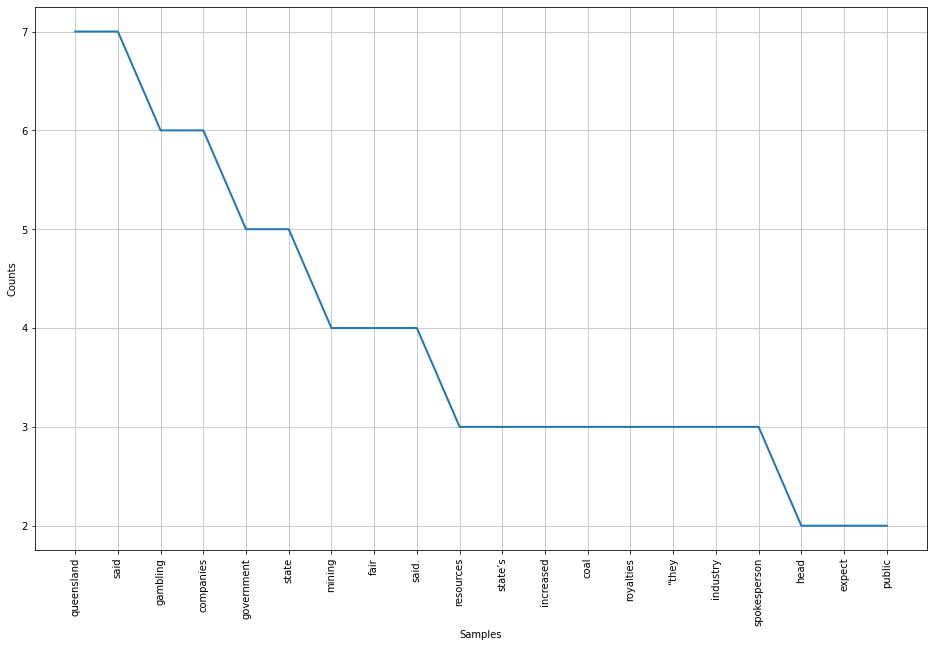

In [68]:
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)

In [56]:
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])

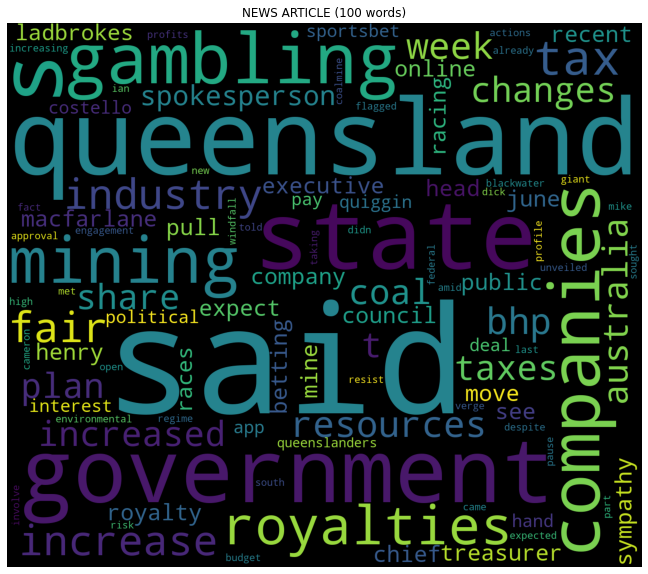

In [57]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()